Alunos:

bfss@cesar.school - Bruno

fom@cesar.school - Fabio

mgrb@cesar.school - Marlos

rmbp@cesar.school - Renata

# Import do dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/mall_customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Tratamento de dados

In [ ]:
df.rename(columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)

In [ ]:
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})

In [ ]:
count = (df['Age']  < 27).sum()
print(count)

35


In [ ]:
# pegando uma amostra do dataframe, das idades menores que 25 anos
df = df[df['Age'] < 27]

# Método

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 162
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      35 non-null     int64
 1   Genre           35 non-null     int64
 2   Age             35 non-null     int64
 3   annual_income   35 non-null     int64
 4   spending_score  35 non-null     int64
dtypes: int64(5)
memory usage: 1.6 KB


In [ ]:
df.describe()

,CustomerID,Genre,Age,annual_income,spending_score
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,65.571429,0.457143,20.828571,44.657143,56.257143
std,47.130785,0.505433,1.992423,20.541125,24.659258
min,1.000000,0.000000,18.000000,15.000000,5.000000
25%,24.000000,0.000000,19.000000,25.000000,44.000000
50%,66.000000,0.000000,21.000000,48.000000,55.000000
75%,103.500000,1.000000,23.000000,62.000000,76.500000
max,163.000000,1.000000,24.000000,81.000000,94.000000


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
print(scaler.fit(df[['annual_income', 'spending_score']].values))
print(scaler.mean_)
print(scaler.transform(df[['annual_income', 'spending_score']].values))

df[['annual_income_std', 'spending_score_std']] = scaler.transform(df[['annual_income', 'spending_score']].values)
features = ['annual_income_std', 'spending_score_std']


StandardScaler()
[44.65714286 56.25714286]
[[-1.4648719  -0.71004105]
 [-1.4648719   1.01803899]
 [-1.41547834 -2.06781823]
 [-1.41547834  0.85345994]
 [-1.36608478  0.81231518]
 [-1.31669122  1.55292091]
 [-1.21790409  0.85345994]
 [-1.21790409  0.93574946]
 [-1.16851053  0.40086755]
 [-0.77336204  1.26490757]
 [-0.72396848  0.68888089]
 [-0.5757878   1.47063138]
 [-0.5757878   1.01803899]
 [-0.37821355  0.77117041]
 [-0.32881999  1.47063138]
 [-0.27942643  0.35972278]
 [ 0.0663285  -0.05172484]
 [ 0.16511562  0.11285421]
 [ 0.16511562  0.11285421]
 [ 0.46147699 -0.17515913]
 [ 0.46147699  0.03056468]
 [ 0.60965767 -0.05172484]
 [ 0.70844479 -0.62775153]
 [ 0.75783835 -0.17515913]
 [ 0.80723191 -0.29859342]
 [ 0.85662547 -0.62775153]
 [ 0.85662547 -0.58660676]
 [ 0.90601904 -0.09286961]
 [ 0.9554126  -0.42202771]
 [ 1.00480616 -0.33973819]
 [ 1.00480616 -0.25744866]
 [ 1.25177396 -1.12148868]
 [ 1.39995465 -2.10896299]
 [ 1.44934821 -1.90323918]
 [ 1.79510314 -2.10896299]]


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escolhendo o número de clusters usando o método do cotovelo (elbow method)
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[features])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

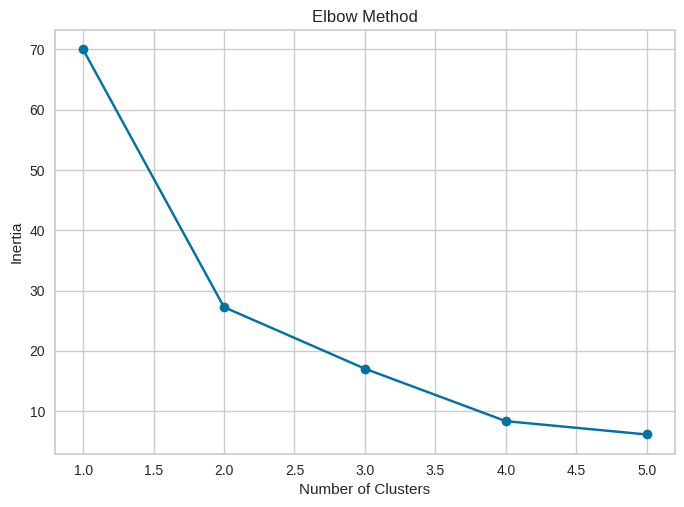

In [ ]:
plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import math

In [ ]:
df.head(15)

,CustomerID,Genre,Age,annual_income,spending_score,annual_income_std,spending_score_std
0,1,1,19,15,39,-1.464872,-0.710041
1,2,1,21,15,81,-1.464872,1.018039
2,3,0,20,16,6,-1.415478,-2.067818
3,4,0,23,16,77,-1.415478,0.853460
5,6,0,22,17,76,-1.366085,0.812315
7,8,0,23,18,94,-1.316691,1.552921
13,14,0,24,20,77,-1.217904,0.853460
15,16,1,22,20,79,-1.217904,0.935749
17,18,1,20,21,66,-1.168511,0.400868
29,30,0,23,29,87,-0.773362,1.264908


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


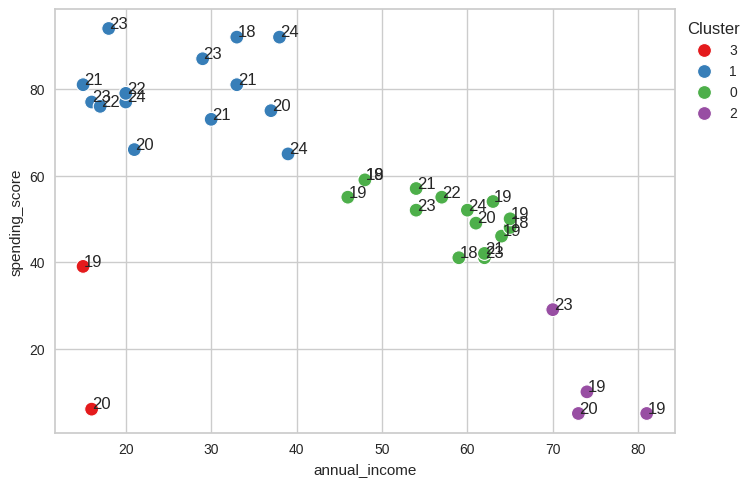

In [ ]:
# Apply K-Means with the current value of k
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])
df['Cluster'] = df['Cluster'].astype(str)

# Scatter plot of data points with cluster coloring
ax = sns.scatterplot(data=df, s=100, x='annual_income', y='spending_score', hue='Cluster', palette='Set1')
#ax.set_xlim(1, 12)
#ax.set_ylim(1, 10)


for i, txt in enumerate(df.Age):
  ax.annotate(txt, (df.iloc[i].annual_income+0.1, df.iloc[i].spending_score+0.1))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [ ]:
kmeans

KMeans(n_clusters=4, random_state=0)

# K-means - clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

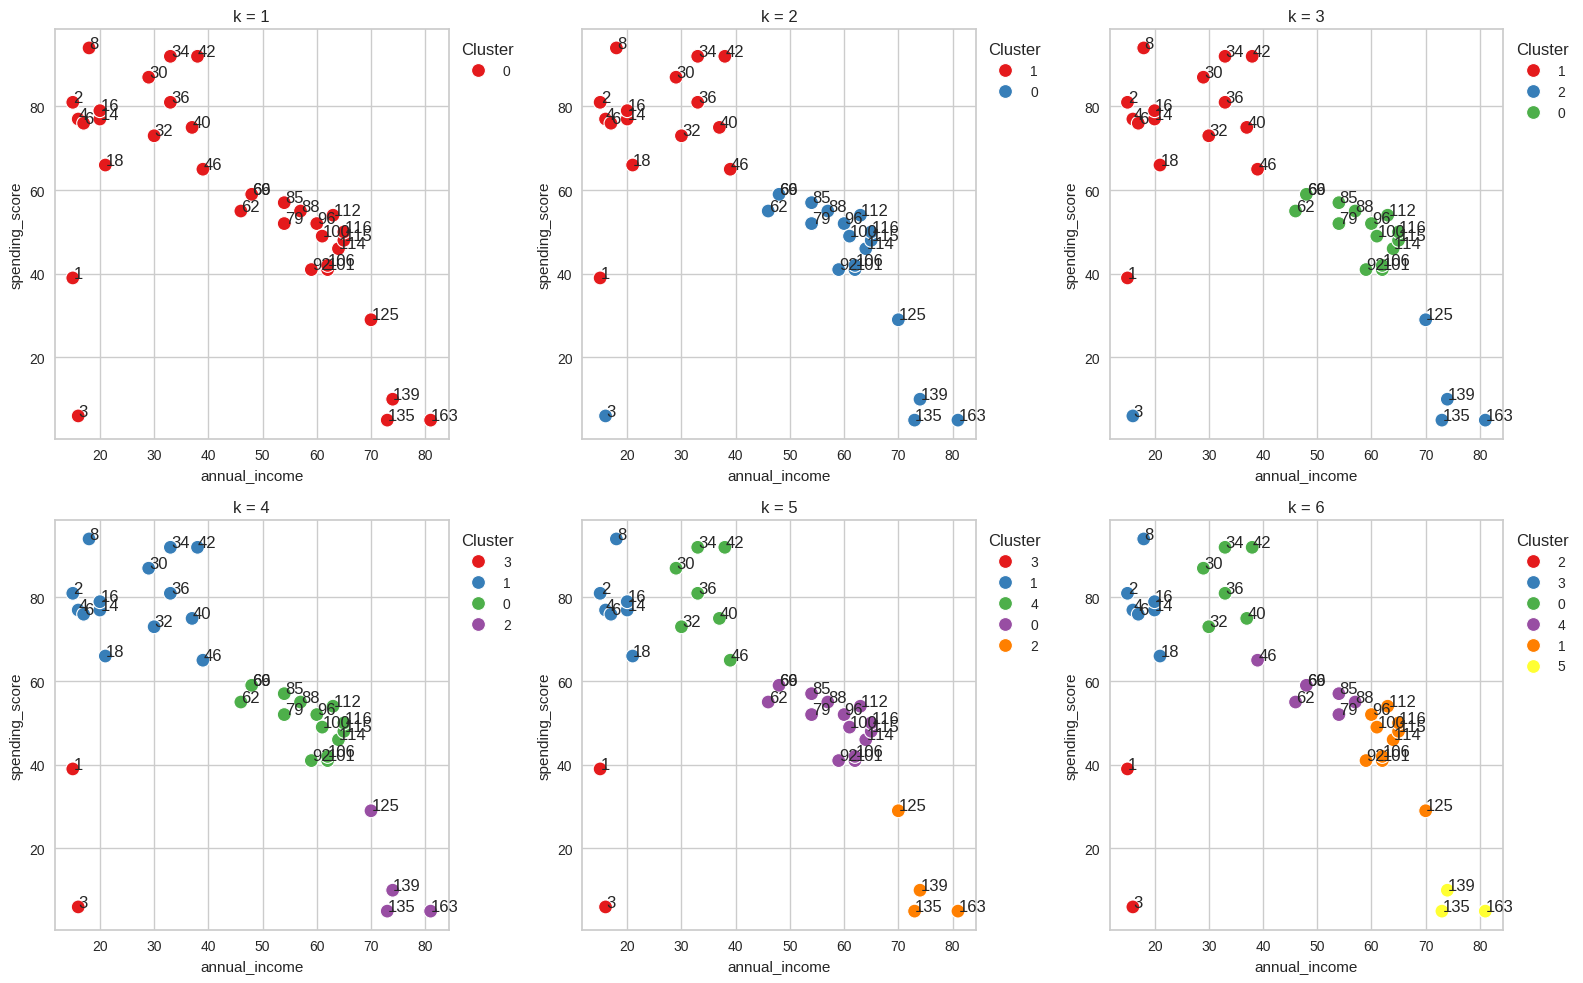

In [ ]:
# Define the number of clusters you want to visualize
num_clusters = 6

# Calculate the number of rows and columns for the grid of plots
cols = 3
rows = math.ceil(num_clusters / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))


# Loop through each value of k
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Apply K-Means with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[features])
    df['Cluster'] = df['Cluster'].astype(str)

    # Scatter plot of data points with cluster coloring
    ax = sns.scatterplot(ax=axes[row, col], data=df, s=100, x='annual_income', y='spending_score', hue='Cluster', palette='Set1')
    #ax.set_xlim(1, 12)
    #ax.set_ylim(1, 10)


    for i, txt in enumerate(df.CustomerID):
      ax.annotate(txt, (df.iloc[i].annual_income+0.1, df.iloc[i].spending_score+0.1))

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    axes[row, col].set_title(f'k = {k}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])
df['Cluster'] = df['Cluster'].astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df[df['Cluster'] == '0']

,CustomerID,Genre,Age,annual_income,spending_score,annual_income_std,spending_score_std,Cluster
61,62,1,19,46,55,0.066328,-0.051725,0
65,66,1,18,48,59,0.165116,0.112854,0
68,69,1,19,48,59,0.165116,0.112854,0
78,79,0,23,54,52,0.461477,-0.175159,0
84,85,0,21,54,57,0.461477,0.030565,0
87,88,0,22,57,55,0.609658,-0.051725,0
91,92,1,18,59,41,0.708445,-0.627752,0
95,96,1,24,60,52,0.757838,-0.175159,0
99,100,1,20,61,49,0.807232,-0.298593,0
100,101,0,23,62,41,0.856625,-0.627752,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 162
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          35 non-null     int64  
 1   Genre               35 non-null     int64  
 2   Age                 35 non-null     int64  
 3   annual_income       35 non-null     int64  
 4   spending_score      35 non-null     int64  
 5   annual_income_std   35 non-null     float64
 6   spending_score_std  35 non-null     float64
 7   Cluster             35 non-null     object 
dtypes: float64(2), int64(5), object(1)
memory usage: 2.5+ KB


In [ ]:
df

,CustomerID,Genre,Age,annual_income,spending_score,annual_income_std,spending_score_std,Cluster
0,1,1,19,15,39,-1.464872,-0.710041,3
1,2,1,21,15,81,-1.464872,1.018039,1
2,3,0,20,16,6,-1.415478,-2.067818,3
3,4,0,23,16,77,-1.415478,0.853460,1
5,6,0,22,17,76,-1.366085,0.812315,1
7,8,0,23,18,94,-1.316691,1.552921,1
13,14,0,24,20,77,-1.217904,0.853460,1
15,16,1,22,20,79,-1.217904,0.935749,1
17,18,1,20,21,66,-1.168511,0.400868,1
29,30,0,23,29,87,-0.773362,1.264908,1


# Avaliação

## Silhueta

In [ ]:
X=df[['annual_income', 'spending_score']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

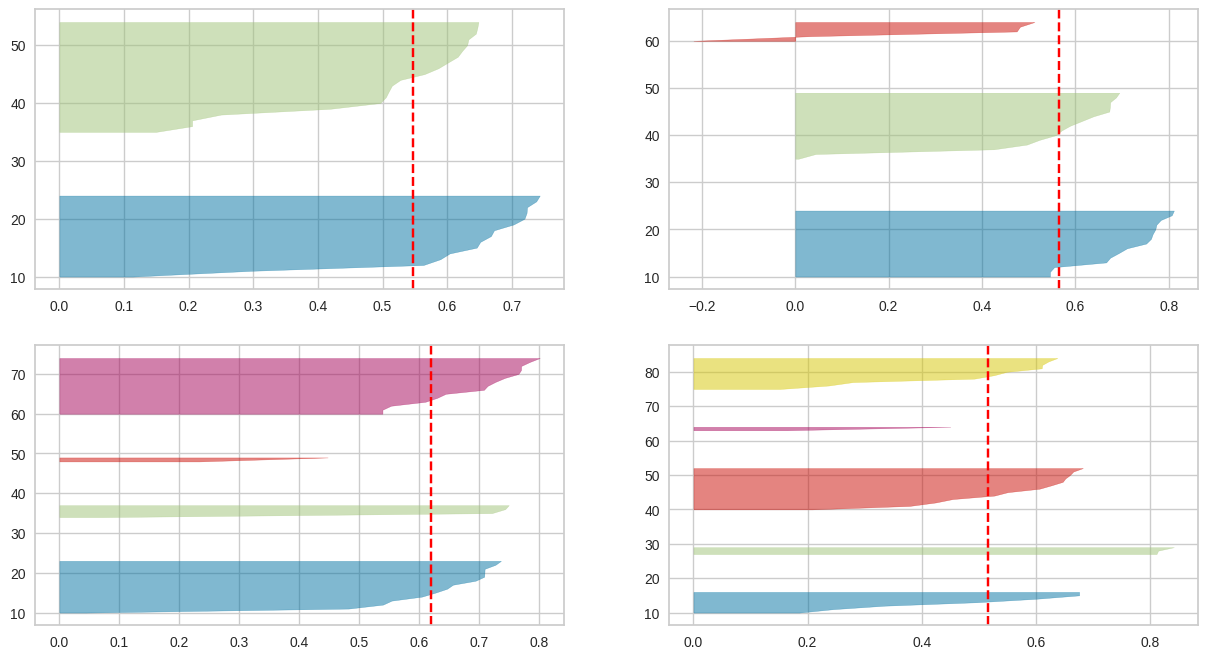

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
  q, mod = divmod(i, 2)
  km = KMeans(n_clusters=i, random_state=42)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

Para 2 clusters: o coeficiente é bom (entre 0,6 e 0,7) e tem muitos itens agrupados em cada um. É uma boa escolha.

Para 3 clusters: o coeficiente é ligeiramente menor, e uma coluna apresenta um coeficiente negativo, indicando que há pontos distantes (mais próximos de outros clusters do que do próprio). Também apresentam tamanhos variados entre cada um. Não é uma boa escolha, clusters mal definidos.

Para 4 clusters: coeficientes mais altos, boa distribuição para 3 dos 4 clusters (com um menor). É uma boa escolha.

Para 5 clusters: coeficientes menores, distribuição boa para 3 dos 5 clusters, 2 deles com poucos elementos. Não é uma boa escolha.

A divisão com 4 clusters é uma ótima escolha.

## Índice Calinski-Harabasz e Davies-Bouldin

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 7)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))

    print("---------------------------------------------------------------")
    print('Soma dos Erros Quadrados para K =', i, ':', kmeans.inertia_)
    print("Coeficiente de Silhueta: %0.3f" % silhouette_score(X, labels))
    print("Índice Calinski-Harabasz: %0.3f" % calinski_harabasz_score(X, labels))
    print("Índice Davies-Bouldin: %0.3f" % davies_bouldin_score(X, labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

---------------------------------------------------------------
Soma dos Erros Quadrados para K = 2 : 14064.08333333333
Coeficiente de Silhueta: 0.547
Índice Calinski-Harabasz: 49.172
Índice Davies-Bouldin: 0.635
---------------------------------------------------------------
Soma dos Erros Quadrados para K = 3 : 8072.399999999999
Coeficiente de Silhueta: 0.565
Índice Calinski-Harabasz: 53.413
Índice Davies-Bouldin: 0.665
---------------------------------------------------------------
Soma dos Erros Quadrados para K = 4 : 4190.745238095238
Coeficiente de Silhueta: 0.620
Índice Calinski-Harabasz: 76.019
Índice Davies-Bouldin: 0.468
---------------------------------------------------------------
Soma dos Erros Quadrados para K = 5 : 3167.595238095237
Coeficiente de Silhueta: 0.517
Índice Calinski-Harabasz: 75.419
Índice Davies-Bouldin: 0.519
---------------------------------------------------------------
Soma dos Erros Quadrados para K = 6 : 2332.333333333333
Coeficiente de Silhueta: 0.4

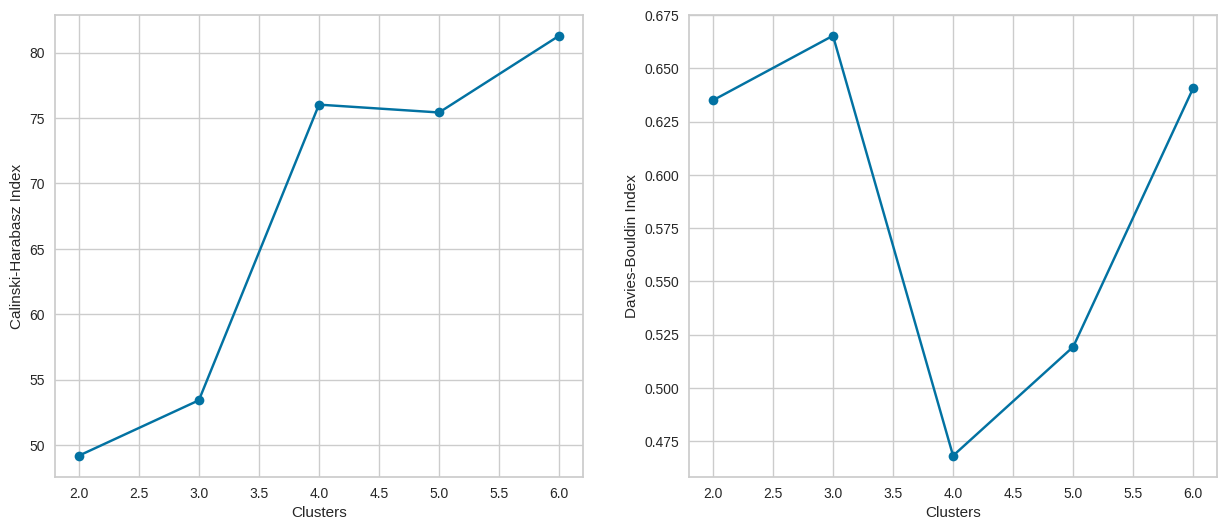

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(index, calinski_score, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Calinski-Harabasz Index')

ax[1].plot(index, davies_score, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Davies-Bouldin Index')

plt.show()

índice Calinski-Harabasz: queremos um índice alto, então a divisão para 4, 5 e 6 clusters são boas.

índice Davies-Bouldin: queremos um índice baixo, então a divisão para 4 clusters é a melhor.

Comparando ambos os métodos, a divisão com 4 clusters é a melhor.

## Método do Cotovelo

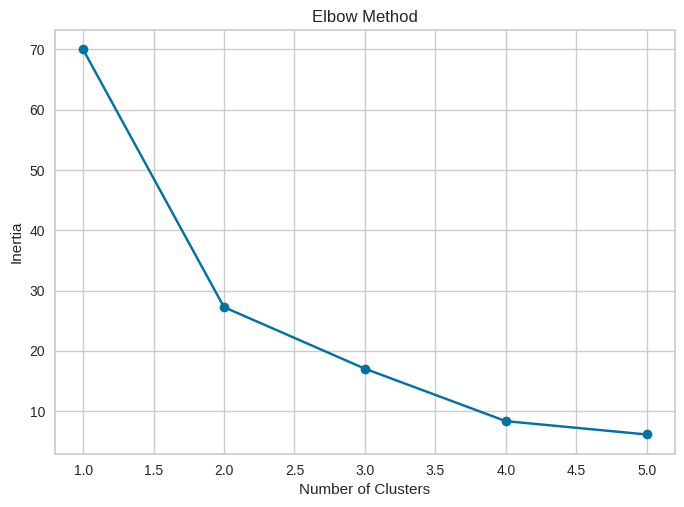

In [ ]:
plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Com isso vemos que a divisão por 2, 3 e 4 clusters atendem os critérios do método.